## Import packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
from tcrdist.repertoire import TCRrep
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import MDS


## Define plot functions (human + mouse)

In [2]:
# Define plot function, focus on TCR and antigen epitope relation
def plot2d_antigen_epitope_human(input_matrix, clone_df, species, chain_name):
    mds = MDS(n_components=2, dissimilarity="precomputed")
    positions = mds.fit_transform(input_matrix)
    
    tsne = TSNE(n_components=2, perplexity=8, init= positions, metric='precomputed', learning_rate=200, random_state=48,n_iter = 1000)
    tsne_results = tsne.fit_transform(input_matrix)
    # -------------------------------------------------------------------------
    # Here specificity is assumed as antigen.epitope
    specificity = clone_df['antigen.epitope']
    # Get unique antigen epitope
    unique_antigen_epitope = np.unique(specificity)
    
    # Define color list
    color_list = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2"  
    ]
    
    # Make sure the length of the color list =  number of unique_antigen_epitope
    colors = color_list[:len(unique_antigen_epitope)]
    
    # Create a dictionary, contains each antigen epitope and its color
    # Mapping color
    color_map = dict(zip(unique_antigen_epitope, colors))
    plt.figure(figsize=(10, 8))
    
    # For loop obtains corresponding antigen.epitope and color
    for antigen_epitope, color in color_map.items():
        # specificity is a series contains all antigen epitope
        true_indiex = (specificity == antigen_epitope)
        # Plot scatter
        plt.scatter(tsne_results[true_indiex, 0], tsne_results[true_indiex, 1], color=color, label=antigen_epitope,
                    alpha=0.7)

    # Add title, xy label and legend
    plt.title('t-SNE 2-dimensional plot of TCRs based on antigen.epitope({} {} chain) '.format(species, chain_name), fontweight='bold', fontsize=15)
    plt.xlabel('t-SNE x-axis')
    plt.ylabel('t-SNE y-axis')
    plt.legend(title='antigen.epitope', bbox_to_anchor=(1, 1), loc='upper left', fontsize=6)
    plt.grid(True)
    plt.show()

In [3]:
# Define plot function, focus on TCR and antigen epitope relation
def plot2d_antigen_epitope_mouse(input_matrix, clone_df, species, chain_name):
    mds = MDS(n_components=2, dissimilarity="precomputed")
    positions = mds.fit_transform(input_matrix)
    
    tsne = TSNE(n_components=2, perplexity=10, init= positions, metric='precomputed', learning_rate=200, random_state=48,n_iter = 1000)
    tsne_results = tsne.fit_transform(input_matrix)
    # -------------------------------------------------------------------------
    # Here specificity is assumed as antigen.epitope
    specificity = clone_df['antigen.epitope']
    # Get unique antigen epitope
    unique_antigen_epitope = np.unique(specificity)
    
    # Define color list
    color_list = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
        "#8c564b", "#e377c2"  
    ]
    
    # Make sure the length of the color list =  number of unique_antigen_epitope
    colors = color_list[:len(unique_antigen_epitope)]
    
    # Create a dictionary, contains each antigen epitope and its color
    # Mapping color
    color_map = dict(zip(unique_antigen_epitope, colors))
    plt.figure(figsize=(10, 8))
    
    # For loop obtains corresponding antigen.epitope and color
    for antigen_epitope, color in color_map.items():
        # specificity is a series contains all antigen epitope
        true_indiex = (specificity == antigen_epitope)
        # Plot scatter
        plt.scatter(tsne_results[true_indiex, 0], tsne_results[true_indiex, 1], color=color, label=antigen_epitope,
                    alpha=0.7)

    # Add title, xy label and legend
    plt.title('t-SNE 2-dimensional plot of TCRs based on antigen.epitope({} {} chain) '.format(species, chain_name), fontweight='bold', fontsize=15)
    plt.xlabel('t-SNE x-axis')
    plt.ylabel('t-SNE y-axis')
    plt.legend(title='antigen.epitope', bbox_to_anchor=(1, 1), loc='upper left', fontsize=6)
    plt.grid(True)
    plt.show()

## Processing data

In [4]:
# Read dataset
data = pd.read_csv("vdjdb.txt", sep='\t')

# human sequence (obtained from human_sequence.csv)
human_sequence = pd.read_csv('human_sequence.csv')
# mouse sequence (obtained from mouse_sequence.csv)
mouse_sequence = pd.read_csv('mouse_sequence.csv')
mouse_sequence

,alpha sequence,beta sequence
0,CAAEDGGSGNKLIF,CASSWDRAGNTLYF
1,CAAGDNNRIFF,CASSRANYEQYF
2,CAAGDTNKVVF,CASSRANYEQYF
3,CAAGGNYKPTF,CASSRANYEQYF
4,CAASDDNRIFF,CASSRANYEQYF
...,...,...
746,CAALRATGGNNKLTF,CASSLNWSQDTQYF
747,CAASKGADRLTF,CASGDFWGDTLYF
748,CAVSGFASALTF,CASGGGGTLYF
749,CAVSHQGRYLTF,CASGGGGTLYF


In [5]:
dismatrix_combined = np.load('distance_combined.npz')

In [6]:
# Check the key in npz
print(list(dismatrix_combined.keys()))

['matrix1', 'matrix2']


In [7]:
dismatrix_combined_human = dismatrix_combined['matrix1']
dismatrix_combined_mouse = dismatrix_combined['matrix2']
print(dismatrix_combined_mouse)

[[ 0.         28.91140473 32.52315232 ... 23.45568119 19.74840534
  13.53565577]
 [28.91140473  0.         14.7630612  ... 28.33151498 26.70496954
  29.11075651]
 [32.52315232 14.7630612   0.         ... 24.73857659 26.15785241
  30.98257995]
 ...
 [23.45568119 28.33151498 24.73857659 ...  0.          7.81514022
  23.11478041]
 [19.74840534 26.70496954 26.15785241 ...  7.81514022  0.
  21.65822052]
 [13.53565577 29.11075651 30.98257995 ... 23.11478041 21.65822052
   0.        ]]


## Preparation and 2D figure plot (human + mouse)

In [8]:
# Remove all complex.id = 0 and vdjdb.score = 0 data, select species is HomoSapiens at the same time 
data_human = data[(data['complex.id'] != 0) & (data['vdjdb.score'] != 0) & (data['species'] == 'HomoSapiens')]
# Clean data, remove non values
data_human = data_human[data_human['v.segm'].notnull() & data_human['j.segm'].notnull()]

# Concat cdr3 in same complex.id 
data_human['alpha_beta_sequence'] = data_human.groupby('complex.id')['cdr3'].transform(lambda x: '_'.join(x))
# Drop duplications 
df_human = data_human.drop_duplicates(subset=['complex.id']).reset_index(drop=True)
df_human = df_human.drop_duplicates(subset='alpha_beta_sequence', keep='first')
print(df_human.shape)
df_human.head()

(1508, 22)


,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,alpha_beta_sequence
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no,CIVRAPGRADMRF_CASSYLPGQGDHYSNQPQHF
1,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no,CAVPSGAGSYQLTF_CASSFEPGQGFYSNQPQHF
2,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no,CASSYEPGQVSHYSNQPQHF
3,4,TRA,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,...,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...",2,sort,sanger,no,no,CAYRPPGTYKYIF_CASSALASLNEQFF
13,15,TRA,CAVAGYGGSQGNLIF,TRAV12-2*01,TRAJ42*01,HomoSapiens,HLA-A*02,B2M,MHCI,ELAGIGILTV,...,PMID:12555663,"{""frequency"": ""6/11"", ""identification"": ""cultu...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVAGYGGSQGNLIF"", ""cdr3_old"": ""CAVAG...",1,sort,sanger,no,no,CAVAGYGGSQGNLIF_CASSPQGLGTEAFF


In [9]:
# Remove all complex.id = 0 and vdjdb.score = 0 data, select species is MusMusculus at the same time 
data_mouse = data[(data['complex.id'] != 0) & (data['vdjdb.score'] != 0) & (data['species'] == 'MusMusculus')]
# Clean data, remove non values
data_mouse = data_mouse[data_mouse['v.segm'].notnull() & data_mouse['j.segm'].notnull()]

# Concat cdr3 in same complex.id 
data_mouse['alpha_beta_sequence'] = data_mouse.groupby('complex.id')['cdr3'].transform(lambda x: '_'.join(x))
# Drop duplications 
df_mouse = data_mouse.drop_duplicates(subset=['complex.id']).reset_index(drop=True)
df_mouse = df_mouse.drop_duplicates(subset='alpha_beta_sequence', keep='first')
print(df_mouse.shape)
df_mouse.head()

(766, 22)


,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,...,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp,alpha_beta_sequence
0,105,TRB,CASGGQGRAEQFF,TRBV13-2*01,TRBJ2-1*01,MusMusculus,H-2Aa,H-2Aa,MHCII,GNSHRGAIEWEGIESG,...,PMID:10583947,"{""frequency"": """", ""identification"": """", ""seque...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CASGGQGRAEQFF"", ""cdr3_old"": ""CASGGQG...",3,other,other,no,no,CASGGQGRAEQFF
1,106,TRA,CAMRGDYGGSGNKLIF,TRAV16*01,TRAJ32*01,MusMusculus,H-2Kb,B2M,MHCI,INFDFNTI,...,PMID:11017099,"{""frequency"": """", ""identification"": """", ""seque...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAMRGDYGGSGNKLIF"", ""cdr3_old"": ""CAMR...",3,other,other,no,no,CAMRGDYGGSGNKLIF_CTCSADRVGNTLYF
2,108,TRA,CAVSGFASALTF,TRAV9-4*01,TRAJ35*01,MusMusculus,H-2Kb,B2M,MHCI,SIYRYYGL,...,PMID:10755612,"{""frequency"": """", ""identification"": """", ""seque...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAVSGFASALTF"", ""cdr3_old"": ""CAVSGFAS...",3,other,other,no,no,CAVSGFASALTF_CASGGGGTLYF
3,110,TRA,CAARYQGGRALIF,TRAV14-1*01,TRAJ15*01,MusMusculus,H-2Kb,B2M,MHCI,KVITFIDL,...,PMID:11911820,"{""frequency"": """", ""identification"": """", ""seque...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAARYQGGRALIF"", ""cdr3_old"": ""CAARYQG...",3,other,other,no,no,CAARYQGGRALIF_CTCSAAPDWGASAETLYF
6,118,TRA,CAASANSGTYQRF,TRAV14-3*01,TRAJ13*01,MusMusculus,H-2Aa,H-2Aa,MHCII,SRGGASQYRPSQ,...,PMID:15664161,"{""frequency"": """", ""identification"": """", ""seque...","{""cell.subset"": """", ""clone.id"": """", ""donor.MHC...","{""cdr3"": ""CAASANSGTYQRF"", ""cdr3_old"": ""CAASANS...",3,other,other,no,no,CAASANSGTYQRF_CASGDAGGGYEQYF


In [10]:
# Add a new column named alpha_beta_sequence in human_sequence 
human_sequence['alpha_beta_sequence'] = human_sequence['alpha sequence'] + '_' + human_sequence['beta sequence']
human_sequence

,alpha sequence,beta sequence,alpha_beta_sequence
0,CILDNNNDMRF,CASSLAPGATNEKLFF,CILDNNNDMRF_CASSLAPGATNEKLFF
1,CAFPYNNNDMRF,CASSLEGYTEAFF,CAFPYNNNDMRF_CASSLEGYTEAFF
2,CATVGTASKLTF,CASSLWLNEQFF,CATVGTASKLTF_CASSLWLNEQFF
3,CARNTGNQFYF,CASSETGATNYGYTGF,CARNTGNQFYF_CASSETGATNYGYTGF
4,CAVTLNNNAGNMLTF,CASSSFYDSNEKLFF,CAVTLNNNAGNMLTF_CASSSFYDSNEKLFF
...,...,...,...
1382,CALSSRGSTLGRLYF,CASSPSGLAGSNLGNEQFF,CALSSRGSTLGRLYF_CASSPSGLAGSNLGNEQFF
1383,CAVNFGGGKLIF,CASSLSFGTEAFF,CAVNFGGGKLIF_CASSLSFGTEAFF
1384,CAGAGSQGNLIF,CASSIRSSYEQYF,CAGAGSQGNLIF_CASSIRSSYEQYF
1385,CAGAGSQGNLIF,CASSSRSSYEQYF,CAGAGSQGNLIF_CASSSRSSYEQYF


In [11]:
# Add a new column named alpha_beta_sequence in mouse_sequence 
mouse_sequence['alpha_beta_sequence'] = mouse_sequence['alpha sequence'] + '_' + mouse_sequence['beta sequence']
mouse_sequence

,alpha sequence,beta sequence,alpha_beta_sequence
0,CAAEDGGSGNKLIF,CASSWDRAGNTLYF,CAAEDGGSGNKLIF_CASSWDRAGNTLYF
1,CAAGDNNRIFF,CASSRANYEQYF,CAAGDNNRIFF_CASSRANYEQYF
2,CAAGDTNKVVF,CASSRANYEQYF,CAAGDTNKVVF_CASSRANYEQYF
3,CAAGGNYKPTF,CASSRANYEQYF,CAAGGNYKPTF_CASSRANYEQYF
4,CAASDDNRIFF,CASSRANYEQYF,CAASDDNRIFF_CASSRANYEQYF
...,...,...,...
746,CAALRATGGNNKLTF,CASSLNWSQDTQYF,CAALRATGGNNKLTF_CASSLNWSQDTQYF
747,CAASKGADRLTF,CASGDFWGDTLYF,CAASKGADRLTF_CASGDFWGDTLYF
748,CAVSGFASALTF,CASGGGGTLYF,CAVSGFASALTF_CASGGGGTLYF
749,CAVSHQGRYLTF,CASGGGGTLYF,CAVSHQGRYLTF_CASGGGGTLYF


In [12]:
# We want a antigen.epitope in df_human matches human_sequence on alpha_beta_sequence specifically
df_merged_human = pd.merge(human_sequence, df_human, on='alpha_beta_sequence', how='left')
# Select three columns 
df_merged_human = df_merged_human[['alpha sequence', 'beta sequence','antigen.epitope' ]]
df_merged_human

,alpha sequence,beta sequence,antigen.epitope
0,CILDNNNDMRF,CASSLAPGATNEKLFF,NLVPMVATV
1,CAFPYNNNDMRF,CASSLEGYTEAFF,NLVPMVATV
2,CATVGTASKLTF,CASSLWLNEQFF,NLVPMVATV
3,CARNTGNQFYF,CASSETGATNYGYTGF,NLVPMVATV
4,CAVTLNNNAGNMLTF,CASSSFYDSNEKLFF,NLVPMVATV
...,...,...,...
1382,CALSSRGSTLGRLYF,CASSPSGLAGSNLGNEQFF,RMEQVDWTV
1383,CAVNFGGGKLIF,CASSLSFGTEAFF,ELAGIGILTV
1384,CAGAGSQGNLIF,CASSIRSSYEQYF,GILEFVFTL
1385,CAGAGSQGNLIF,CASSSRSSYEQYF,GILGFVFTL


In [13]:
# Do the same steps on mouse data
df_merged_mouse = pd.merge(mouse_sequence, df_mouse, on='alpha_beta_sequence', how='left')
# Select three columns 
df_merged_mouse = df_merged_mouse[['alpha sequence', 'beta sequence','antigen.epitope' ]]
df_merged_mouse

,alpha sequence,beta sequence,antigen.epitope
0,CAAEDGGSGNKLIF,CASSWDRAGNTLYF,GAMKRHGLDNYRGYSLG
1,CAAGDNNRIFF,CASSRANYEQYF,SIINFEKL
2,CAAGDTNKVVF,CASSRANYEQYF,SIINFEKL
3,CAAGGNYKPTF,CASSRANYEQYF,SIINFEKL
4,CAASDDNRIFF,CASSRANYEQYF,SIINFEKL
...,...,...,...
746,CAALRATGGNNKLTF,CASSLNWSQDTQYF,PADPLAFFSSAIKGGGGSLV
747,CAASKGADRLTF,CASGDFWGDTLYF,FEAQKAKANKAVD
748,CAVSGFASALTF,CASGGGGTLYF,SIYRYYGL
749,CAVSHQGRYLTF,CASGGGGTLYF,QLSPFPFDL


In [15]:
# We focus on the first 7 antigen.epitope
print(df_merged_human['antigen.epitope'].value_counts().head(10))
print(df_merged_mouse['antigen.epitope'].value_counts().head(10))

NLVPMVATV         277
GILGFVFTL         161
TFEYVSQPFLMDLE     86
YLQPRTFLL          53
GLCTLVAML          52
QYIKWPWYI          48
KLVALGINAV         33
ELAGIGILTV         22
CINGVCWTV          21
DATYQRTRALVR       20
Name: antigen.epitope, dtype: int64
SSYRRPVGI        210
SSLENFRAYV       105
ASNENMETM        100
SSPPMFRV          89
HGIRNASFI         88
TVYGFCLL          58
LSLRNPILV         55
SIINFEKL           6
RVSYYGPKTSPVQ      4
QLSPFPFDL          3
Name: antigen.epitope, dtype: int64


In [17]:
# Filtering first 10 antigen.epitope values in original combined chains distance matrix
dismatrix_human_df = pd.DataFrame(dismatrix_combined_human)
contact_human_df = pd.concat([dismatrix_human_df, df_merged_human], axis=1)
dismatrix_mouse_df = pd.DataFrame(dismatrix_combined_mouse)
contact_mouse_df = pd.concat([dismatrix_mouse_df, df_merged_mouse], axis=1)

In [18]:
# Get index of firrst 10 antigen.epitope
top10_epitope_index_human = contact_human_df['antigen.epitope'].value_counts().head(10).index
top10_epitope_index_mouse = contact_mouse_df['antigen.epitope'].value_counts().head(10).index

In [19]:
filtered_contact_human_df = contact_human_df[contact_human_df['antigen.epitope'].isin(top10_epitope_index_human)]
filtered_contact_mouse_df = contact_mouse_df[contact_mouse_df['antigen.epitope'].isin(top10_epitope_index_mouse)]

# Get clone df manually 
human_clone_df = filtered_contact_human_df[['alpha sequence', 'beta sequence', 'antigen.epitope']]
mouse_clone_df = filtered_contact_mouse_df[['alpha sequence', 'beta sequence', 'antigen.epitope']]

# Adjust index of all columns 
filtered_contact_human_df = filtered_contact_human_df.loc[:, filtered_contact_human_df.index]
filtered_contact_mouse_df = filtered_contact_mouse_df.loc[:, filtered_contact_mouse_df.index]

# final correct distance matrix
dismatrix_human = filtered_contact_human_df.values
dismatrix_mouse = filtered_contact_mouse_df.values

E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


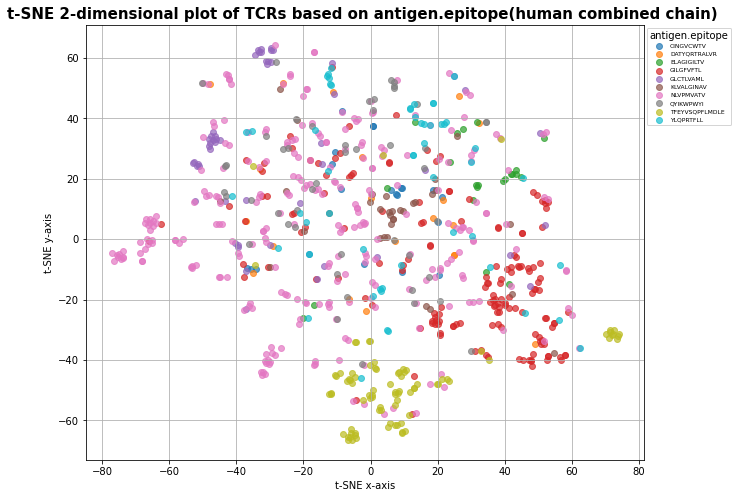

In [28]:
plot2d_antigen_epitope_human(dismatrix_human, human_clone_df, 'human','combined' )

E:\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


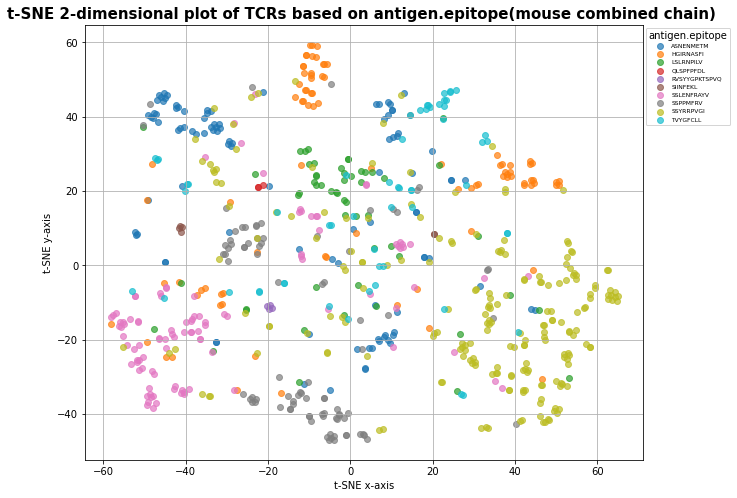

In [24]:
plot2d_antigen_epitope_mouse(dismatrix_mouse, mouse_clone_df, 'mouse','combined' )